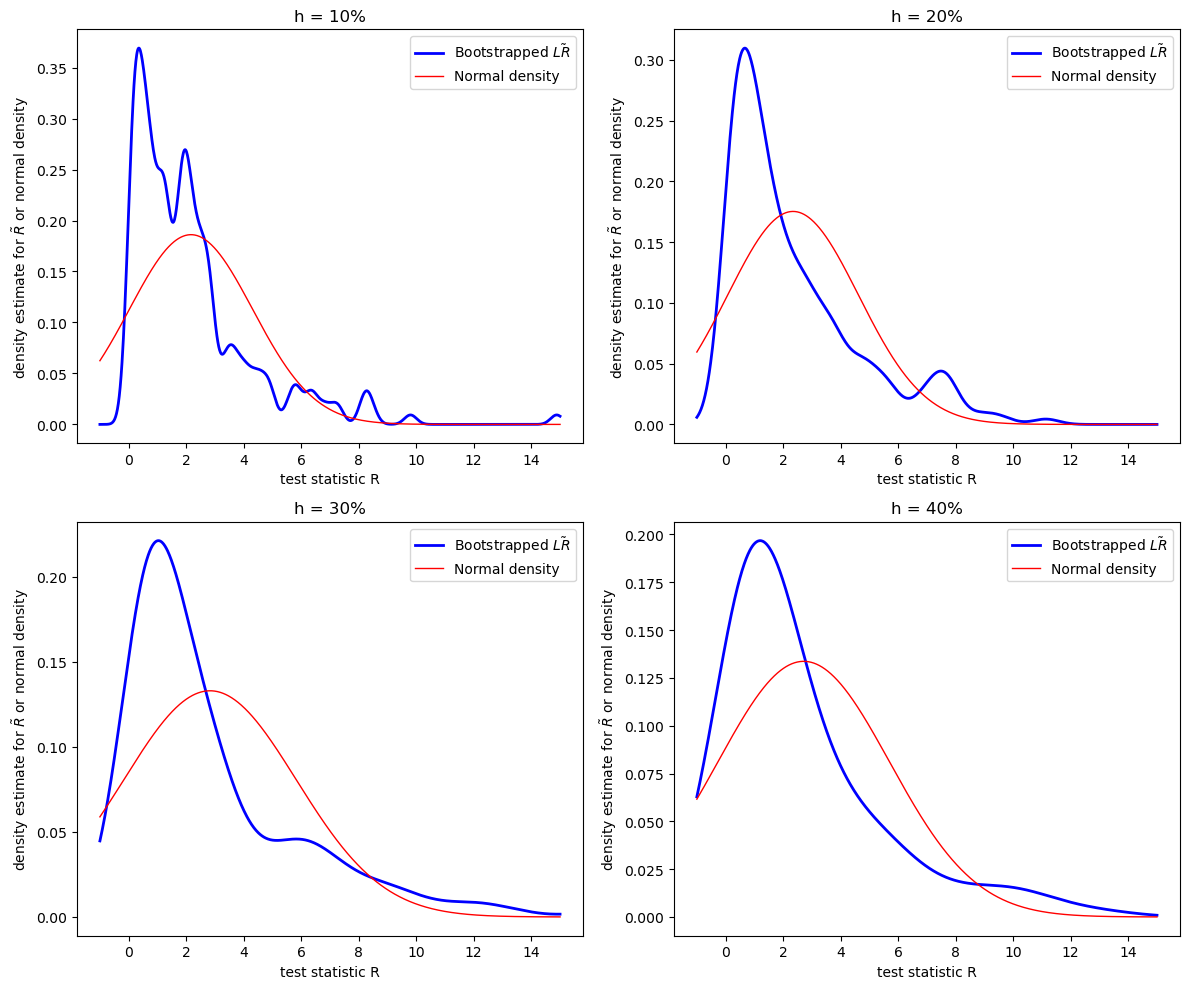

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Simulate some data for the bootstrapped LR statistic
np.random.seed(0)
n_boot = 200
bandwidths = [0.1, 0.2, 0.3, 0.4]

# Generate bootstrap samples for LR
bootstrapped_LR = [np.random.chisquare(df=2, size=n_boot) * (1 + bw) for bw in bandwidths]
x = np.linspace(-1, 15, 1000)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, bw in enumerate(bandwidths):
    # Calculate KDE for the bootstrapped LR statistic
    kde = gaussian_kde(bootstrapped_LR[i], bw_method=bw)
    boot_density = kde(x)
    
    # Calculate normal distribution density for comparison
    normal_density = norm.pdf(x, loc=np.mean(bootstrapped_LR[i]), scale=np.std(bootstrapped_LR[i]))
    
    # Plot densities
    axes[i].plot(x, boot_density, color='blue', linewidth=2, label='Bootstrapped $\\tilde{LR}$')
    axes[i].plot(x, normal_density, color='red', linewidth=1, label='Normal density')
    axes[i].set_title(f'h = {int(bw * 100)}%')
    axes[i].set_xlabel('test statistic R')
    axes[i].set_ylabel('density estimate for $\\tilde{R}$ or normal density')
    axes[i].legend()

plt.tight_layout()

# Save the figure
plt.savefig('bootstrapped_LR_density_plot_v2.png')
plt.show()
